# Four Problems for Week 05's Assignment 

Problem 1:

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

Problem 2:

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

Problem 3:

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

Problem 4:

    a. print the NFA for Rev_RE2 and answer the stated questions.
    
    b. print the NFA for Rev_RE1_hand and answer the stated questions. 

# Imports 


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 22.75 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_e

## Problem 1: 

In [ ]:
# Given NFA
# RE is (a(bs*(d+f)+c)+''s*(f+d))
nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3


''')


Generating LALR tables


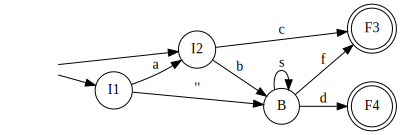

In [ ]:
dotObj_nfa(nfa1)

## 1.1: Convert the given NFA to a DFA by hand.

Use as many bullets as necessary to clearly show your work:

* One e-closure to perform from I1 to B, merge I1 and I2 together with B.

* a could only have gone to I2, so 'a' will go to I1_I2_B

* b could only have gone to B, so 'b' will go to I1_I2_B

*

*

In [ ]:
# I1 merges with I2, since there can only be one initial state.

# I1_I2 given b or '' goes to B, so I1_I1 becomes I1_I2_B
# I1 (F(I1, '')) = [B] -> I1_B

# I1_B has no e-closure.

# (I1_B, a) = [I2]

# I2 (F(I2, b))  = [B]

In [ ]:
# DFA of nfa1

dfa1 = md2mc('''DFA

I1_I2_B : b | s -> B

I1_I2_B : a -> _I2

I1_I2_B : f | c -> F3

I1_I2_B : d -> F4

!!_I2 : a | f | d | s -> H

_I2 : c -> F3

_I2 : b -> B

B : s -> B

B : f -> F3

B : d -> F4

!!B : a | b | c -> H

!!F3 : a | b | c | f | d | s -> H

!!F4 : a | b | c | f | d | s -> H

!!H : a | b | c | f | d | s -> H

''')

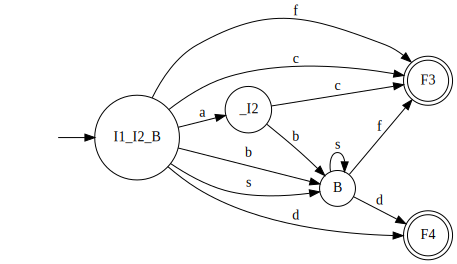

In [ ]:
dotObj_dfa(dfa1, FuseEdges=False)

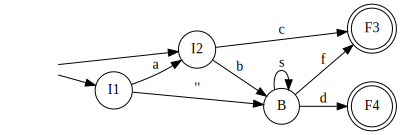

In [ ]:
dotObj_nfa(nfa1)

## 1.2: Reverse nfa1 by hand and name the states in this manner:

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [ ]:
# There is no Jove function to reverse automatically - do it by hand!
rnfa1 = md2mc('''
NFA


I3 : f -> B
I3 : c -> F2

I4 : d -> B

B : b  -> F2
B : '' -> F1
B : s  -> B

F2 : a -> F1


''')

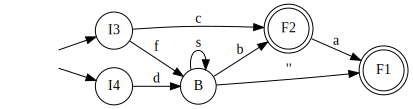

In [ ]:
dotObj_nfa(rnfa1)

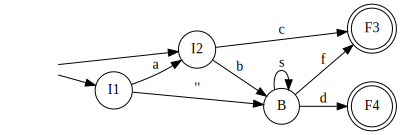

In [ ]:
dotObj_nfa(nfa1)

## 1.3: Inspect and conclude that rnfa1 is truly the reverse of nfa1
### List the first six strings in numeric order and check that they have been correctly reversed. State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

1. c -> c `{I3, F2}`

2. d -> d `{I4, B, F1}`

3. f -> f `{I3, B, F1}`

4. ac -> ca `{I3, F2, F1}`

5. sd -> ds `{I4, B, B, F1}`

6. sf -> fs `{I3, B, B, F1}`

 
 

# Problem 2: Extraction of RE by Inspection and other things before it


## 2.1: Totalize dfa1 to obtain the totalized machine, then explain totalize_dfa in a few sentences below, by looking at the Delta before and After

In [ ]:
tdfa1 = totalize_dfa(dfa1)

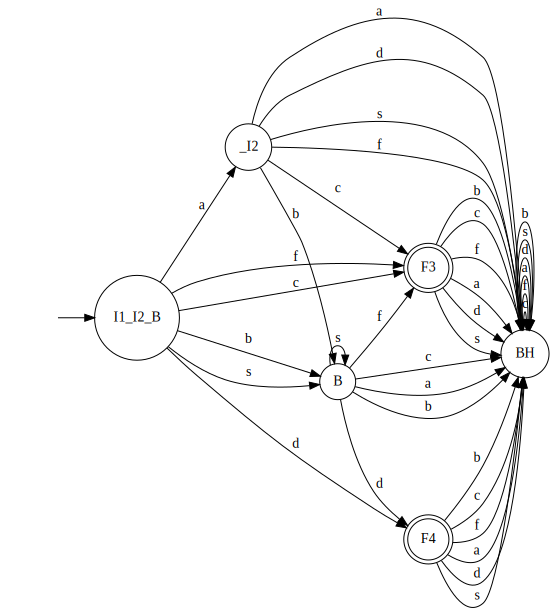

In [ ]:
dotObj_dfa_w_bh(tdfa1)

### Your explanation of totalize_dfa:

* For any input in $\sum$ where a state does not have a transition, the next state becomes the black hole. 

* For any input received by the black hole, the next state is the black hole.



##  Compare the dfa with and without the black hole:

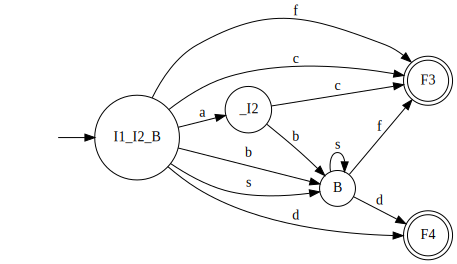

In [ ]:
dotObj_dfa(tdfa1)

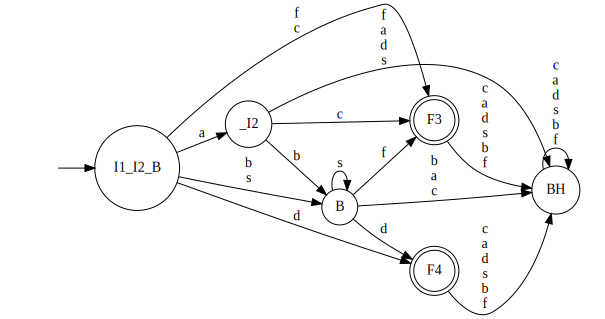

In [ ]:
dotObj_dfa_w_bh(tdfa1, FuseEdges=True)

### Was it a good idea to not always show black-holes?

* In what circumstances might you still need to apply the _w_bh view option?
An open-ended answer - anything you may think up can be a valuable piece of feedback.

Answer:

* Drawing the black hole can matter when multiple black hole states exist in a DFA system or a system modeled as a DFA.
* It's helpful to not draw the black holes when doing so would cause unnecessary clutter in the drawing. 


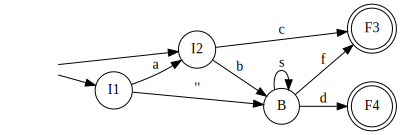

In [ ]:
dotObj_nfa(nfa1)

## 2.2: Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




In [ ]:
RE1_hand = "(a (((b (s*) (d + f)) + c)) + '' (s*) (f + d) + (b (s*) (d + f)) + c)"

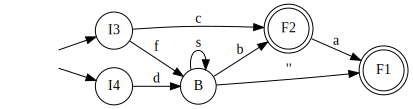

In [ ]:
dotObj_nfa(rnfa1)

## 2.3: Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [ ]:
Rev_RE1_hand = "(f (((s*) (( b + (b a) ) + '')) )) + (c + c a) + (d ((s*) (b + (b a) + ''))"

## 2.4: Understand del_gnfa_states via help

In [ ]:
# help of del_gnfa_states run below


### Document what you learned from the function help of del_gnfa_states and summarize below


*

*

*

# Problem 3: Converting to GNFA and Attempting Two Elimination Orders

Work on rnfa1 to obtain Rev_RE1 and Rev_RE2 

## 3.1: Obtain grnfa1 below via a suitable command

In [ ]:
grnfa1 = mk_gnfa(rnfa1)

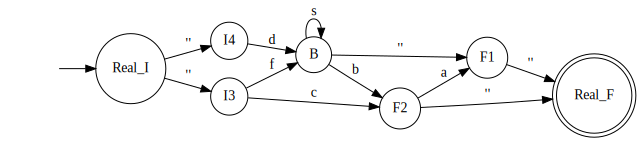

In [ ]:
dotObj_gnfa(grnfa1)

## 3.2: Apply the elimination order by supplying the second argument 
['B', 'F2', 'F1', 'I3', 'I4']

as you learned in the help

In [ ]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [ ]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, DelList=['B','F2','F1','I3','I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [ ]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

Generating LALR tables


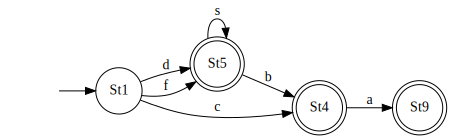

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

## 3.3: Apply the elimination order by supplying the second argument 
 ['I3', 'I4', 'F1', 'B', 'F2' ]

as you learned in the help

In [ ]:
(Gfinal, DO, Rev_RE2) = del_gnfa_states(grnfa1, DelList=['I3', 'I4', 'F1', 'B', 'F2'])

**** Eliminating state I3 ****
**** Eliminating state I4 ****
**** Eliminating state F1 ****
**** Eliminating state B ****
**** Eliminating state F2 ****


In [ ]:
Rev_RE2

'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'

Generating LALR tables


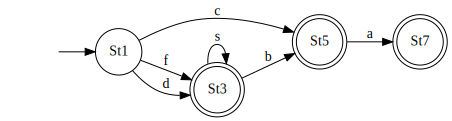

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE2))))

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO[0] is the initial GNFA machine, DO[1] is the next one, and so on. You will see each step getting
rid of one state.

### Summarize your observation of the state elimination and which REs were introduced as a result. Use one bullet per question answered below.

*

*

*

*

*

*

*

In [ ]:
(Gfinal, DO, Rev_RE2) = del_gnfa_states(grnfa1, ...args...)

In [ ]:
Rev_RE2

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

### Summarize your observation of the state elimination and which REs were introduced as a result

*

*

*

*

*

*

*

## 3.4: Check for isomorphism as requested between Rev_RE1 and Rev_RE2

Apply a Jove call that is compact (and will be given in class) that checks that Rev_RE1 and Rev_RE2 are equivalent. It has to involve iso_dfa and min_dfa and other calls.

In [ ]:
iso_dfa( ... )

In [ ]:
# Just look at it again for comparison

...Rev_RE1_hand...

## 3.5: Check for isomorphism as requested between Rev_RE1 and Rev_RE1_hand

Same methods as above.

In [ ]:
iso_dfa( ... )

# Problem 4: Chasing down the RE2NFA components

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

Let's first look at the NFA and then see where the RE "parts" are in it.

In [ ]:
dotObj_nfa(re2nfa(Rev_RE2))


This is an exercise in explaining how Rev_RE2 got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). Explain how the concatenation is accomplished.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

## Repeat finding out the aforesaid paths in your own Rev_RE1_hand


This is an exercise in explaining how Rev_RE1_hand got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). If such a case does not arise in your RE, skip this part. Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain. 
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). If such a case does not arise in your RE, skip this part. Explain how the concatenation is accomplished.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

# END
